In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

x_train = train.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
x_test = test2.drop(columns=['hash','trajectory_id','x_exit','y_exit'])
y_train=pd.DataFrame()
y_train=train[['x_exit','y_exit']]



In [3]:
def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814262 entries, 0 to 814261
Data columns (total 13 columns):
hash             814262 non-null object
trajectory_id    814262 non-null object
time_entry       814262 non-null int64
time_exit        814262 non-null int64
vmax             814262 non-null float64
vmin             814262 non-null float64
vmean            814262 non-null float64
x_entry          814262 non-null float64
y_entry          814262 non-null float64
x_exit           814262 non-null float64
y_exit           814262 non-null float64
x_req            814262 non-null float64
y_req            814262 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 80.8+ MB


In [ ]:
test2.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,x_req,y_req
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,0,0,0.0,0.0,0.0,3.773118e+06,-1.914490e+07,NaN,NaN,3.773385e+06,-1.911344e+07
1,000479418b5561ab694a2870cc04fd43_25,traj_000479418b5561ab694a2870cc04fd43_25_10,0,0,0.0,0.0,0.0,3.769978e+06,-1.934136e+07,NaN,NaN,3.771380e+06,-1.933274e+07
2,000506a39775e5bca661ac80e3f466eb_29,traj_000506a39775e5bca661ac80e3f466eb_29_5,0,0,0.0,0.0,0.0,3.757468e+06,-1.923860e+07,NaN,NaN,3.755349e+06,-1.916135e+07
3,0005401ceddaf27a9b7f0d42ef1fbe95_1,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0,0,0.0,0.0,0.0,3.760505e+06,-1.935500e+07,NaN,NaN,3.751349e+06,-1.916284e+07
4,00063a4f6c12e1e4de7d876580620667_3,traj_00063a4f6c12e1e4de7d876580620667_3_4,0,0,0.0,0.0,0.0,3.766319e+06,-1.917013e+07,NaN,NaN,3.776264e+06,-1.918289e+07


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as patches

data=train[['x_entry','y_entry']]
clusters=50
kmeans = KMeans(n_clusters=clusters)

kmeans.fit(data)  



C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 1600x1000 with 1 Axes>

In [ ]:
data=train[['x_entry','y_entry']]

train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in range(clusters):
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


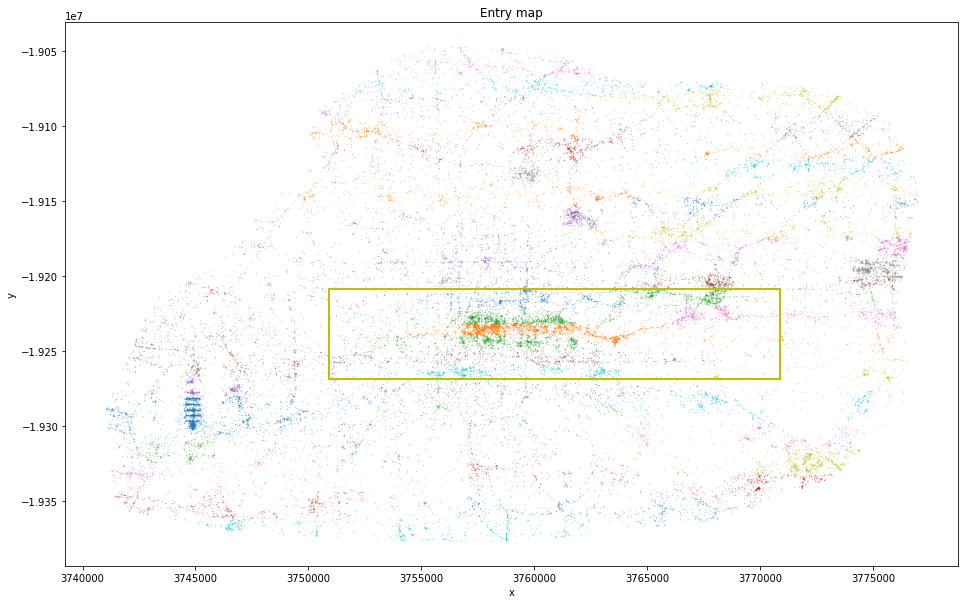

In [ ]:
data=test2[['x_entry','y_entry']]#[:10000]


test2_c=kmeans.predict(data)
data['c']=test2_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



# Plot
for c in range(clusters):
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


In [ ]:
import lightgbm as lgb

params = {}
params['learning_rate'] = 0.01
params['num_boost_round']=100
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'l2'
#params['num_leaves'] = 200
params['max_depth'] = 10
#params['verbose']=1

pred = pd.DataFrame({'c':test2_c,'target':test2_c})

for c in range(clusters):
    xc_train=x_train[train_c==c]
    yc_train=y_train[train_c==c]
    xc_test=x_test[test2_c==c]
    
    
    d_train = lgb.Dataset(xc_train, label=yc_train.x_exit.values)
    clf = lgb.train(params, d_train)
    #Prediction
    predx=clf.predict(xc_test)

    d_train = lgb.Dataset(xc_train, label=yc_train.y_exit.values)
    clf = lgb.train(params, d_train)
    #Prediction
    predy=clf.predict(xc_test)
    
    target = [within_measure(x, y) for x,y in zip(predx,predy)]
    
    def add(row,c):
        if row['c']==c:
            return target.pop(0)
        else:
            return row.target
        
    pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
    
city_lgbm=pred.target.values    
pred[:20]   

D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


,c,target
0,28,0
1,23,0
2,41,1
3,30,0
4,18,0
5,18,0
6,41,1
7,31,0
8,36,1
9,25,0


In [ ]:
from sklearn.neural_network import MLPRegressor


pred = pd.DataFrame({'c':test2_c,'target':test2_c})

for c in range(clusters):
    xc_train=x_train[train_c==c]
    yc_train=y_train[train_c==c]
    xc_test=x_test[test2_c==c]
    
    
    model = MLPRegressor(hidden_layer_sizes=[200],
                      learning_rate_init=.1,
                      max_iter=200,
                      learning_rate='adaptive',
                      solver='sgd',
                      activation='relu',
                      verbose=True)
    model.fit(xc_train, yc_train)

    

    predc = model.predict(x_test)
    predx=predc[:,0]
    predy=predc[:,1]
    
    target = [within_measure(x, y) for x,y in zip(predx,predy)]
    
    def add(row,c):
        if row['c']==c:
            return target.pop(0)
        else:
            return row.target
        
    pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
    
    
pred[:20]   

Iteration 1, loss = 13066703044461683628231020754663311230537853729712978383549527605115984874516332948267930568871616526155776.00000000
Iteration 2, loss = 15352169760153051275174384560266064490183893981140567009090911468205402437904473962147384330835912342634496.00000000
Iteration 3, loss = 15350733408973521968715298087512393831710264531050764096028451990772264346693992739738606400960210787106816.00000000
Iteration 4, loss = 15349205672988074571569232062464151947549735716923306814800519407970529308256932923194151087277297924833280.00000000
Iteration 5, loss = 15347678086345035336443523819888849590027979100808205935945272074826530539360052294878261502654207993315328.00000000
Iteration 6, loss = 15346150651730700642337797527359101604929717126272542271305002771269164262499555397465243134962760247410688.00000000
Iteration 7, loss = 15344623369130000497099130656808694031052097213680857057703370900916224310631118518099446819250609913331712.00000000
Iteration 8, loss = 153430962385278160197

Iteration 58, loss = 15331898565729554038468756277103856863247216966862134048327067908121079025521167435412161409248017256546304.00000000
Iteration 59, loss = 15331898077430332003872526452766493868046335066653639845272819077696437147209447012535273874493400680497152.00000000
Iteration 60, loss = 15331897589131615154198427580978525447376178692229086406380199399461953031729166476220727647241917586997248.00000000
Iteration 61, loss = 15331897100832922748956044723023592248054283230342465585108303712462476549934278192481778580030908694265856.00000000
Iteration 62, loss = 15331896612534238491857567203013004122515141405968488969709982689208002612701187326268028566166724535123968.00000000
Iteration 63, loss = 15331896124235576642154829362349364949878572084754283920463991991252285673013039358248575949006308393353216.00000000
Iteration 64, loss = 15331895635936920903560020525143984582579067991674562025623182291105320641746239453373022621856010801774592.00000000
Iteration 65, loss = 1533189514763

Iteration 17, loss = 22696480252981741745443319191939136512658939332075105392120599540106445678813827980403398035842486717382656.00000000
Iteration 18, loss = 22696134890533341676851700081021192000452780500687061751740321361377574893439029047871639657762886093111296.00000000
Iteration 19, loss = 22695789533340201094022462906679414708163686374356615155569470814469854863173826837822124061150760289697792.00000000
Iteration 20, loss = 22695444181402193700725074930776455992158975571637780412567640611335746147310361378614265919130325936504832.00000000
Iteration 21, loss = 22695098834719274682168056794618417946633503086211014390430170101377734750758746873859470438294046998790144.00000000
Iteration 22, loss = 22694753493291313668048923091095779391063210717874009795179864664675779960530224643154552765092727739121664.00000000
Iteration 23, loss = 22694408157118286213935957806375505104099837554088834009196000309994874142939402433923915739485893956730880.00000000
Training loss did not improve more

Iteration 74, loss = 22693244643963082192731032647993866390095979499083664499771750781747087361879625057631651984681341739335680.00000000
Iteration 75, loss = 22693244533462101953785648453774867240685634512299507869831544903444035447258033828396480501178190283145216.00000000
Iteration 76, loss = 22693244422961138011128074935444558238840796800540639651638488352630988621760037434211707124368688294133760.00000000
Iteration 77, loss = 22693244312460169994398548748142076700104582270025449330508644469945440523981142331264334220885773938327552.00000000
Iteration 78, loss = 22693244201959201977669022560839595161368367739510259009378800587259892426202247228316961317402859582521344.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 22693244126291349526733527669091080586755055643915395176033887328699783670619235621955269282658834383372288.00000000
Iteration 80, loss = 2269324410280135064707145474472994986

Iteration 35, loss = 38527834026501151730881501042785686640337514669574726118627567713302713739850795982351430396971036935454720.00000000
Iteration 36, loss = 38527815845743504537234986709932421891221982906925151348653961310503136249489546970303106613192073217572864.00000000
Iteration 37, loss = 38527799940738787894575226565808585967947169334257292125403510602912279370383385560676500058325631622971392.00000000
Iteration 38, loss = 38527784047469321437563766033456434622640232422229923435832473342806191996142650973633689520926196041252864.00000000
Iteration 39, loss = 38527768154266873464173710093342515140481964051701148056413045385346033642685675531353092761160194233204736.00000000
Iteration 40, loss = 38527752261071269931664138026478457635836751191793505610796334973688012721138530810239700812726968640339968.00000000
Iteration 41, loss = 38527736367882217506854457666867839452525462892051804687533654213012037627276509779386347755140828853436416.00000000
Iteration 42, loss = 3852772047469

Iteration 92, loss = 38527618230780901423550259987157695469480709178778042404845629001806548199315836144170713200505196755550208.00000000
Iteration 93, loss = 38527618225695066294011569927348647414360029274131418089874184619823306517659942023152386659564407461249024.00000000
Iteration 94, loss = 38527618220609263757048501219316979654370363919535370598397038892820075014251237572234856332010917101305856.00000000
Iteration 95, loss = 38527618215523453071941527173340966820597944927426678901046318502071840966280735703792126951110602007773184.00000000
Iteration 96, loss = 38527618210437658683122363803253644134391033210343275615442747438813612007433828670399795676903936381419520.00000000
Iteration 97, loss = 38527618205351847998015389757277631300618614218234583918092027048065377959463326801957066296003621287886848.00000000
Iteration 98, loss = 38527618200266045461052321049245963540628948863638536426614881321062146456054622351039535968450130927943680.00000000
Iteration 99, loss = 3852761819518

Iteration 52, loss = 19506845264110622142685922797400639699139717038061302119307069066301589127472295149042221637067791386279936.00000000
Iteration 53, loss = 19506843038277022264931255817630180941736973206133290130996595893724541125275462191526665442766976784007168.00000000
Iteration 54, loss = 19506840812443679053709606983106592008490968955853570627703724629115073276775247886054879428891141289803776.00000000
Iteration 55, loss = 19506838586610580286805118286913355288727573830953177300618093276855681765128956106339065015420047803285504.00000000
Iteration 56, loss = 19506836360777738186433647735966988393120918287701076458550063832563870407179282978667020782373933424836608.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000032
Iteration 57, loss = 19506834835073892263476168883322017168986666659921403725636359828328447521791147801322233704116280969134080.00000000
Iteration 58, loss = 1950683436055499453482534063912119972

Iteration 9, loss = 23297869896773046161825320348815158003226883005371742277824489461252014064405859179459496527388071866400768.00000000
Iteration 10, loss = 23295627640370353608745141945454202114032526284680958630030330034193888960571101129050794140453139770245120.00000000
Iteration 11, loss = 23293385599769089056333552297148765365606601186175699947771383775230307480182283622629633743005358919516160.00000000
Iteration 12, loss = 23291143774948515478351466335540634980841100240176462282800131453329793713464979058564424567375782328926208.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 13, loss = 23289642808091239901441815390651706828487075352460341090388463948039112516181730666600091008949165899120640.00000000
Iteration 14, loss = 23289176633692879529726375935020183628236742630194765403751209170533511903923467452957209825824134892879872.00000000
Iteration 15, loss = 23288728333246734626462975147192095145

Iteration 68, loss = 23283644030289568120771752139283944235166097945573824765432601445457356790135125277687507341852676974444544.00000000
Iteration 69, loss = 23283643881150928741536085668992609867630292663767768849415107130823254922024763559636867710185791650004992.00000000
Iteration 70, loss = 23283643737727609349245992148888998641847433325936462011379704818343974857229786871857420928404489076998144.00000000
Iteration 71, loss = 23283643594304558845704774780948774850895444026022413967172266409449778762974124962409542907068402712444928.00000000
Iteration 72, loss = 23283643450881500194019652075064205986160701088595721717091253336810580124156665635436465832385491614302208.00000000
Iteration 73, loss = 23283643307458433394190624031235292047643204513656385261136665600426378940777408890938189704355755782569984.00000000
Iteration 74, loss = 23283643164035382890649406663295068256691215213742337216929227191532182846521746981490311683019669418016768.00000000
Iteration 75, loss = 2328364302061

Iteration 26, loss = 30297807910228981163741137224824898814362165571879984069056136608988016188828423743442759877352450305294336.00000000
Iteration 27, loss = 30297691215005700207786999606973787355874082362605211136552474660057714168570359071054613785246464351404032.00000000
Iteration 28, loss = 30297574520231858647435444992280428143402513894515867881616902889850266360215148962358451723972546094170112.00000000
Iteration 29, loss = 30297457825907533890053574091216099377883619723982074260048380603943196937099868883843664700325530502692864.00000000
Iteration 30, loss = 30297341132032611861626712172559970026358848925826811389616862509906470275359354990157465967449871306719232.00000000
Iteration 31, loss = 30297224438607178117665865284727663363547114693932843431994882577062613092892480165314445585487228208939008.00000000
Iteration 32, loss = 30297107745631187843379554069025281483643272021980627254877780154814111394609358612926008761030065174609920.00000000
Iteration 33, loss = 3029699105310

Iteration 84, loss = 30296484798775378787770168126928740279941504413325639727154174050062267901165617105910180912771885025984512.00000000
Iteration 85, loss = 30296484761434476379654656348514034902600570161847494705800683971523678596331352208711055278397440093323264.00000000
Iteration 86, loss = 30296484724093561749323286563182811914585505454100383375636831897367585474654391185224131064002758060277760.00000000
Iteration 87, loss = 30296484686752667489351680122712451611027324840134882560156916482573998714381923705550204482975137861206016.00000000
Iteration 88, loss = 30296484649411769155308121013269918770577767407413059641740213735907910681828557517113678375274105295339520.00000000
Iteration 89, loss = 30296484612070850450904798558966523245671325880909626208639574329879316287870697784864154634206010895499264.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 90, loss = 3029648458721502302318240538273457223

Iteration 42, loss = 12007454735716730113241295670565230195581174547034745326758632982351326029075464542762753441433534043521024.00000000
Iteration 43, loss = 12007449202932173860604715436829077377168043700763854126753235786284268112454658459836596528043112685109248.00000000
Iteration 44, loss = 12007443670150163902938553310700760115865424577194277262239921010530505371395545353535143785535420573417472.00000000
Iteration 45, loss = 12007438137370702277278785626666364680119005585704175784687082321026288442038574578239694977247163891843072.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000160
Iteration 46, loss = 12007434206286766634669884940159549854206589163850962803933934780081230400886616581874102918142559545982976.00000000
Iteration 47, loss = 12007432971477871092004839389211741694281187537612183665116608472251103911674661873698075659827911745077248.00000000
Iteration 48, loss = 1200743186457151894936039552817889413

Iteration 1, loss = 12684508969981443379720826758896303827116902756002357778770278620148348107420644055718072147790848201850880.00000000
Iteration 2, loss = 15104141757905985588512060898013505106066092529631678397003319745210646770229042494328033356750601588834304.00000000
Iteration 3, loss = 15102951728586893026343305436572483682969674723712139190703137228098087220319839437136501025747389269409792.00000000
Iteration 4, loss = 15101559234350357764635724436589728432748598170253080895679614281973425019170395467492109673270993211097088.00000000
Iteration 5, loss = 15100166856003394380430907019692754395944078746789239087044735037322103424724181123159842026531751521681408.00000000
Iteration 6, loss = 15098774606034282111712745934678016199712599529378839568096005929465303345619008007425707019834780538634240.00000000
Iteration 7, loss = 15097382484431974112381579263499680063085916460254500225734576586115824992198027310501088078222447697985536.00000000
Iteration 8, loss = 150959904911846066849

Iteration 61, loss = 15085774989301433928118717950589173490128556602852009083130556364929946113094347028897540081508035099361280.00000000
Iteration 62, loss = 15085774544187470332504480875988913706153846957708214244808658346995261659696629816924479594666633514188800.00000000
Iteration 63, loss = 15085774099073527107250007146249516606636021406346029921170696988423083567703406148764416741192293762990080.00000000
Iteration 64, loss = 15085773653959583881995533416510119507118195854983845597532735629850905475710182480604353887717954011791360.00000000
Iteration 65, loss = 15085773208845663064136799366117671360502942806781432840047104596577484381261901710638588430947382277963776.00000000
Iteration 66, loss = 15085772763731748357385994319183482019224754986713503236966654561112815195234969003816722264186929094328320.00000000
Iteration 67, loss = 15085772318617851983958976282624069093957762851049023097101747519074401734472080486426553967456831561269248.00000000
Training loss did not improve more

Iteration 21, loss = 16539500123223449696202837892369151543734201706489759695569612326600521013776529880553108348188869649235968.00000000
Iteration 22, loss = 16539228426341728356105289304390761923175241343506365355392281758692003610658299015299392068860904690679808.00000000
Iteration 23, loss = 16538956733923207840127960762550866053954815584597086655383646496206037107867650146122240122871830334668800.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 16538773396106007528285123839008337638331256108784157919297892578430528582345845526223911221486290431115264.00000000
Iteration 25, loss = 16538716410150112098258354856736928693753870670021447111832912683528163229422695166383970182146779611398144.00000000
Iteration 26, loss = 16538662072560289122203716126520403007290871432230127054410345980479367645691828480851668484338149786386432.00000000
Iteration 27, loss = 1653860773561761414250675661553658610

Iteration 77, loss = 16538045427825115719167171543724436563552969617658110835484021729208463168537720455293960348162893463683072.00000000
Iteration 78, loss = 16538045340889123765280661710160368423335246958155307634342837198860707638390285847815903272710070920544256.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 16538045282224041905297405638512955421205412275409900167148240289899098072146961807563525560535044423942144.00000000
Iteration 80, loss = 16538045263989304548433690985214078191502957500807092540003064350895871317284934101458141411453625922748416.00000000
Iteration 81, loss = 16538045246601953787365359198942011683721919947420085249938981232794772627949835472241307698777438895996928.00000000
Iteration 82, loss = 16538045229214757841031228833612501577813201506773317871472816725848722285288887776003255999690921807446016.00000000
Iteration 83, loss = 1653804521182755782062514579931081893

Iteration 19, loss = 80098868887270534415730538781581572307090689165473196592426443350271582229392263024444188764755043903312467791638770733078301343147909747784476685136909983189421045301610696086577523923877742154318122015185810049587844456495574916530176000.00000000
Iteration 20, loss = 80097487636843835838556914347382835362690127133361552478314622228786053543552838477811637984074599398192991843914311096512538578531409444222458960182104238365736944071967936007274582511072972155922124860640573232858096990616669179923660800.00000000
Iteration 21, loss = 80096106410235703463259200125639503039544336949775297422270557205909373014564161124783524547138891795885212348521831126715686087204448311925202895575177947436177382839883548259331900500166667939702446948034222506062296562600571023925444608.00000000
Iteration 22, loss = 8009472520744596378241977308346856278440605356237850711710990412071842409421159876145091106191208687949542335853031693172288765459827659099734905174779128822532060496738

Iteration 49, loss = 80088621334210532524066695956733493985096065209397163665664314117288361300057658244773198083140076550726105051140247386204014346661631905329839828008603020770105102678386966608678475593051548976768036782701699047113063498460735921580933120.00000000
Iteration 50, loss = 80088610285540995380058249316653169939605348857072285339977712360178027111163229483216305178618058892766231584052569245175906109013604045654014444526382309244862570713892349541757777893395234953413820005054865765091745247626628636889579520.00000000
Iteration 51, loss = 80088599236872892564035486415072416334292023604057714620348355666698789720843093607306628048258937427794327278261272611057275911800574201113160428142437461036439893623272973101895128631187424252179750561500577490328335734765832230422970368.00000000
Iteration 52, loss = 8008858818820632818044898107172104070110444848175500609108685053340451905802602993938952912728421268594661570192496581902703748376379222764449344259777236945009012538931

Iteration 80, loss = 80088506389981577008384016433491802001612418507096132479549436808924455133825001169994931453380359826714884591214771735302088599054818689779856866995699198085116867162256924332666249512333459001282455651758890618329623512413786417695555584.00000000
Iteration 81, loss = 80088506301575476088715208700274561270532433458845264980940170171380671447280407181330625062739276193762623684989022976285473319172157638600961949319259660316879266298300658269282247494845455189892998685018617947988382893099332693949153280.00000000
Iteration 82, loss = 80088506213186216955717010025568405707986976157334783566357910087440734040769445785427174859043167213959420027533689330657567933429473281264956632409672195042913509759847217633289523904172135547914303963752099556417425519665045411293298688.00000000
Iteration 83, loss = 8008850612479701565852468569515658766319060720660294358750376472380850215033002845749337045269233630645411835238869364901794795254303884389407112868953133716075500543405

Iteration 18, loss = 17731091497806551386515984188557257697312708838784564789308536456609624041322077579785542726435652419715072.00000000
Iteration 19, loss = 17730580849163682663636674401106145837928136694624946664624015418561379107443126000748602503854145268613120.00000000
Iteration 20, loss = 17730070215227297023703003637774391048299490653084457181430404438793281954700597934418059798398984643411968.00000000
Iteration 21, loss = 17729559595996964652123965321997790686386516335371114479896640004756448357459679606339664546025165847265280.00000000
Iteration 22, loss = 17729048991472276104668316222073004794605843456474547214875595263264500451490050785872164316054746017300480.00000000
Iteration 23, loss = 17728538401652807677852978764894089536254282865737256680941387699577305919578245761705208334452839006863360.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 1772818255146854681372391873331813242

Iteration 75, loss = 17726811593712098428508109298847985857910180708496300256874942500346190541695798806273891485976151514415104.00000000
Iteration 76, loss = 17726811430341798867230490838716037768358233326521407724588099537773972050491273084585189306710738675433472.00000000
Iteration 77, loss = 17726811266971497268916896044098003410360597535168354140832862909265502923146298008515187364108619653054464.00000000
Iteration 78, loss = 17726811103601205855783182921910400394591403790706105814419594610438286976503569704351684238190031547662336.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 17726810989739364774275009492650990609679570782322674614074621162808180929582070565025578316562428795551744.00000000
Iteration 80, loss = 17726810955359734157532561489622105024710364113615626020087601266799359174221459433393211465354087562739712.00000000
Iteration 81, loss = 1772681092268567913416338100036232245

Iteration 36, loss = 24956699897840325140920981815564679472170725205597151630526546680760895413489691606053257789049393997938688.00000000
Iteration 37, loss = 24956685479968895245988876219695162155880907882312101222999867481170365932684628204970174475378552100356096.00000000
Iteration 38, loss = 24956671062570754363870277790081428047727502299722071084994319241925138596163460463836704338695773115908096.00000000
Iteration 39, loss = 24956656645181185329140094877918711559030923380433745525989317262422588138653175959212638322872613867618304.00000000
Iteration 40, loss = 24956642227799931475265309337960142865634431542798832060967259634695134406457156039054206247484095247417344.00000000
Iteration 41, loss = 24956627810427009098533731846094412115103534061842619101675295686232782488698995538411806219223866722484224.00000000
Iteration 42, loss = 24956613393062418198945362402321519307438230937565106648113425417035532385378694457285438238091928292818944.00000000
Iteration 43, loss = 2495659897570

Iteration 95, loss = 24956521580394151418465405415826343195556188977387161186746601415708461091387217436865103902039677926899712.00000000
Iteration 96, loss = 24956521575780619376327676631007324420858730674405608230593753680925213662037731455247305083121158781403136.00000000
Iteration 97, loss = 24956521571167087334189947846188305646161272371424055274440905946141966232688245473629506264202639635906560.00000000
Iteration 98, loss = 24956521566553522699476597709591906576332799518391925494793759556378708625091569821910911231896821556051968.00000000
Iteration 99, loss = 24956521561939974361051058248884197654069833940385084126893762494105456106618489005242714306284652943376384.00000000
Iteration 100, loss = 24956521557326442318913329464065178879372375637403531170740914759322208677269003023624915487366133797879808.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 117559883195074612659465604440989520

Iteration 52, loss = 12697586243927444028601152789230174777784274415610518739749972878217027799221324876864504067887864953700352.00000000
Iteration 53, loss = 12697582160384325180237408546011040025899563102915505935021999663583404249432719167042253899080705788346368.00000000
Iteration 54, loss = 12697578076842536516366210722206238569049383114159659739155090305321446099357541868208749189142684381478912.00000000
Iteration 55, loss = 12697573993302049518483890635010562648994096718048725431591733480323644443029502019025793251359914165534720.00000000
Iteration 56, loss = 12697569909762876408806306291340529876407834370851669321142291184207503097291295745781184665752632240898048.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000032
Iteration 57, loss = 12697567253583835986078284369332560186672503017671974657398319806425292716358706125864557684460284129837056.00000000
Iteration 58, loss = 1269756642384862340687231987735167562

Iteration 12, loss = 4067537731218036629928321059259966829348407093870576347180633415652526951946202502603845125404939018402258172060513804623162763121196379779437265456851540537645722230714596636909162037751784473849565666877587760944587036065020707014541574144.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 13, loss = 4067383618269839990725133723255239963236223564890023391180142725944399639617063674481343306849162757917841272933093143300828912426162752237542068651652767811194312000657652498996624897695371394926746447755055912177097256939813556871246118912.00000000
Iteration 14, loss = 4067332813954721987206000427412526932909339973380415240940000300879159636315831153438336204923169864147751600191121504610852346607860320345107968304685884166761040483067154154412789485512356969990471876394113908929501066807187679698246172672.00000000
Iteration 15, loss = 4067292555311891247282429772052951598020968818337

Iteration 41, loss = 4066842062980327489742712463600943393060229488044783301537102280999102198376009761290645852400984426297260461843594593571272635542375873575966349775913834041245767466130324983402622329914616143220200242644798112897917785332277927680084541440.00000000
Iteration 42, loss = 4066840457933576115416049914768488139447862598055170349844495187078100862169601856416842563249712429728735137246469845133102361732286524641656824933414007412038914438322987478795818205908365562087485386925017942314112133327272582796783124480.00000000
Iteration 43, loss = 4066838852887456215552245806679327639627141957207076050005735855364751432638740703262819947833124537737622816306539122704627452304676301854511468418568018929540363969181755912191860697202023798383666363969594360732110947640323588429975650304.00000000
Iteration 44, loss = 4066837247841970751344560905761331974506820889060366843530103759538808432206289358108623870975298987625576080518091730042048119988185201116744414666675534892210647

Iteration 72, loss = 4066830103634882419705445322443815655896678479358629629464496073553002864000693444824894369011855856301996158551817992146966086903267977606161846779916414325194602031835554027667888657908783430998642527557916610260586695605898406739207782400.00000000
Iteration 73, loss = 4066830090794545097895332918094466316327233223145457936150927895693793386130315448895672207868975040496923440669285467698781360420636812043120496234539281150086930179251421482715935840689609722940174100003836578217052744353191157334886318080.00000000
Iteration 74, loss = 4066830077954208516383535705352084496984976297822252853214679586254522538865653217036461512932113784017263868160325269189646687120165645455632679297987064549594391154989289061958593629115570726273767683977030117790168036320083036125777625088.00000000
Iteration 75, loss = 4066830065113871194573423301002735157415531041609081159901111408395313060995275221107239351789232968212191150277792744741461960637534479892591328752609931374486719

Iteration 1, loss = 11034484883728507469022106201400691481934450576690992791047191668925507069494432833496009197638752262946816.00000000
Iteration 2, loss = 13284869541041780018995548066689128159687347325700249061061020414508439266994710231635150318158208592510976.00000000
Iteration 3, loss = 13284031317723092311211071689849171054556000088870115398264872158484158830756095497757268084233383054409728.00000000
Iteration 4, loss = 13282874127304256911489195609460115878452829494230216811124691007085342493497195954400783589625755737260032.00000000
Iteration 5, loss = 13281717004353705084142305974497945611921563599303564163067581551054763748759831462440118869880964248502272.00000000
Iteration 6, loss = 13280559982201170955566151321184443858342461931078635032111565479078375019745567614084417984493602079768576.00000000
Iteration 7, loss = 13279403060841339898898474975320536242914464421933246137217568363478266616022038828522598387997236747304960.00000000
Iteration 8, loss = 132782462402654343261

Iteration 61, loss = 13269750725677944055197121238583016620596330159310292730419503084114528312325690812539832897885440401473536.00000000
Iteration 62, loss = 13269750355749917050345095340900141335608107152554288487274212124373206415424073742174353537849314414428160.00000000
Iteration 63, loss = 13269749985821900230672951115647697392848326192689089501470889494313137699224703443715372994496719344369664.00000000
Iteration 64, loss = 13269749615893891559144712228339598523871298870336534721541141527998071527587130562781591504490949007900672.00000000
Iteration 65, loss = 13269749245965893072796355013461930997122713594874785198953361891364258536651804453754308831168709588418560.00000000
Iteration 66, loss = 13269748876037910882735808474472953617939635594438324088112731582220450634840073179777424264540119636115456.00000000
Iteration 67, loss = 13269748506109936840819167273428321312539311231514507183145675936821645277590139323325738751258354417401856.00000000
Training loss did not improve more

Iteration 21, loss = 22792227323796058285378546672754293778936722513523598638997152262851103201805347530127523642875534746058752.00000000
Iteration 22, loss = 22791939130312943537399787710272912672608660675486458790791105991151104602609656397099634591092172266668032.00000000
Iteration 23, loss = 22791650940473862077126027562656291373819251335972680237330116418851591291859524427405380939633227519229952.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 22791449195817827108914446930877306692951990242049690119887952256884223404695099828906491010796490632200192.00000000
Iteration 25, loss = 22791386227107093618623729796772475403470545863387660005975361135228549216807188902955940703643463323746304.00000000
Iteration 26, loss = 22791328582525714103642855170404839264981472295125543920303714633278314803356266918327455222854285449494528.00000000
Iteration 27, loss = 2279127094583955195903432975869555058

Iteration 78, loss = 22790671949047136709562260726875598125067776163120547348338198709209760465672810115069969856772578895462400.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 22790671884491433657618014835914458350577549679994784587607800322172334757464011053032665827787945019441152.00000000
Iteration 80, loss = 22790671864342100445849351051534472897458939237466829177534766562749954047236945843948819851921694608326656.00000000
Iteration 81, loss = 22790671845896413754384366022599894237601874488640014637946727263439600495861126473583843843558042025066496.00000000
Iteration 82, loss = 22790671827453171506090982376968837712570900993606461860431087087630010313024532360778583839241809518657536.00000000
Iteration 83, loss = 22790671809009953702229314745170816408888188411110841700536170903055427763873330500548920994966051213017088.00000000
Iteration 84, loss = 2279067179056672367615178910645627749

Iteration 39, loss = 15314523463184480175099245225435629199570460396376669611744317807881452268008759321322020672685612690571264.00000000
Iteration 40, loss = 15314514744117963603061971983532111988233640907419378125628854540960278478931217824205312179539421605920768.00000000
Iteration 41, loss = 15314506025056397028447191542818227099919656207393441707709999499128150511145607473647028594589256176893952.00000000
Iteration 42, loss = 15314497305999802858650643582640923487531078799458631924140083007683825362196871167841467314538884420861952.00000000
Iteration 43, loss = 15314488586948162760348541092625424735056712999211499311703562073201047306820964717356930469357950687248384.00000000
Iteration 44, loss = 15314479867901493029828694748660420990062066081677332282147586023169821434141482957243816165740104443232256.00000000
Iteration 45, loss = 15314471148859787555983175547287653447210072818721647681066973859781395835737077824358225113675227138621440.00000000
Training loss did not improve more

Iteration 1, loss = 22940676816271855472975251794623186759344415214275696987454041994811246162504683070761053256043000309481472.00000000
Iteration 2, loss = 28738072171319881934620164078879394227206118221491091840136073411512856366597294986940454728690971430617088.00000000
Iteration 3, loss = 28739448984117751548266119001461510105018738204779885291759043339033498402542296505167485885501693686185984.00000000
Iteration 4, loss = 28737234078820245552649402835594468423203117253943768601742482622535453249329606866347485950192249481461760.00000000
Iteration 5, loss = 28735017703595729405401015105050686236495139572997824309084874776882882226467357540083533723214044230320128.00000000
Iteration 6, loss = 28732801498561014268455855971346645071831423878333953223888003638423423337118909412460092476983663667445760.00000000
Iteration 7, loss = 28730585464452044573416001236701581524411887130733151950352285987659402675107912068218260023384457963634688.00000000
Iteration 8, loss = 287283696012560195862

Iteration 61, loss = 28711997033324574538482991422332646942134864094141807726375970591584616845185385961150291326580704975781888.00000000
Iteration 62, loss = 28711996324683045386212389838873596415390901150258297273362150140597372499344912376105422150383155059621888.00000000
Iteration 63, loss = 28711995616041536604301551600275408573103822300156397335032266348972634514908932334873550607552666977435648.00000000
Iteration 64, loss = 28711994907400040044606571368593738341490873906323463705512744552965400347315648419929477644742415995633664.00000000
Iteration 65, loss = 28711994198758555707127449143828585720552055968759496384803584752575669996565060631273203261952402114215936.00000000
Iteration 66, loss = 28711993490117099888151995601868640857852875762489783784651936275293448551780763803955125565876274800361472.00000000
Iteration 67, loss = 28711992781475644069176542059908695995153695556220071184500287798011227106996466976637047869800147486507008.00000000
Training loss did not improve more

Iteration 17, loss = 24137413904006614988682874937342772362646382725756781992357440030384900572135195234615470907632654835777536.00000000
Iteration 18, loss = 24137012834505164665214694370631389871928509793882150326450328249438771060313453043428553851019227002044416.00000000
Iteration 19, loss = 24136611771667938649404075069729815504212569797232229054473136890536294112768049905856385728785969185816576.00000000
Iteration 20, loss = 24136210715494786200588768282667665394517620441823100367764734674394922655105733597682784054016623815688192.00000000
Iteration 21, loss = 24135809665985633985473625967945833878798878990040966413462949627309633786270327361180957346589768289353728.00000000
Iteration 22, loss = 24135408623140347559684210049482627239640910422927197794653799797487885520992173807185121226282794502586368.00000000
Iteration 23, loss = 24135007586958820997349751134001559517867917452817419834980814556244644779967906507867687999586980918722560.00000000
Training loss did not improve more

Iteration 76, loss = 24133663209087718528329968796267642458491919855153063349492857316859458600565769136178834801229938051514368.00000000
Iteration 77, loss = 24133663080764478310332863701872177378379446668219249875972497265008241374531469515846057454943738045399040.00000000
Iteration 78, loss = 24133662952441225870119900600560194687592843025016470093641775217539520331654473769225481528637300938899456.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 24133662865976316819084527684820481028830984749660268421751381438577628005684284026749393936519744689537024.00000000
Iteration 80, loss = 24133662839096417111981041091773096713530324743958478395103515045300876909026306273880106676426343375175680.00000000
Iteration 81, loss = 24133662813431576772185454097407459956234844261273312441783080970548573412161027296218853548184039661240320.00000000
Iteration 82, loss = 2413366278776692383969968987576175989

Iteration 33, loss = 10959631125223584799252960535071849655023382824945346684164291407862747109058796118391443575561318398164992.00000000
Iteration 34, loss = 10959578957485009369974795195413928521217610358743710838542584693983422301850823371140740245177768804876288.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 35, loss = 10959538157141879652713550330417389018180586981082144754388649757284741667959148006694500067970743223189504.00000000
Iteration 36, loss = 10959525984186132847475682544922293042003617297980493270030839171451602286930887258494912267353242235568128.00000000
Iteration 37, loss = 10959515550341578434705416563116367387392622127857952864819425199109538175840833040785698460447440231202816.00000000
Iteration 38, loss = 10959505116886922892985452890652653579771623984651468767497639754820484527459454175757686115788671401590784.00000000
Iteration 39, loss = 1095949468344227327198124421384469037

Iteration 91, loss = 10959395406469501183477303948513982636261209975240284391313742879056291488551244652697238277790016429096960.00000000
Iteration 92, loss = 10959395403130711625718098870218290609793637566016002480954345729004879938020091463989239592877062243745792.00000000
Iteration 93, loss = 10959395399792042253081497526601688421621681310103222607230174869192255919775450183777926944829772878839808.00000000
Iteration 94, loss = 10959395396453368806372943514012913696558348235434120630569216677507130629249910194804014770109071147139072.00000000
Iteration 95, loss = 10959395393114703507808294839368484045277768798277662859781833149567007883286167623355301648735194149027840.00000000
Iteration 96, loss = 10959395389776030061099740826779709320214435723608560883120874957881882592760627634381389474014492417327104.00000000
Iteration 97, loss = 10959395386437364762535092152135279668933856286452103112333491429941759846796885062932676352640615419215872.00000000
Iteration 98, loss = 1095939538309

Iteration 49, loss = 16482968349994689426506850475270930917910387370193603613039021458335349128101324062498611145385049029869568.00000000
Iteration 50, loss = 16482965554483463777495484861154825880297069952762505997856866151381467893486312652096028502929185234223104.00000000
Iteration 51, loss = 16482962758972720906010510520241166464311905557955577580684009671318987424157798230061489771272686903754752.00000000
Iteration 52, loss = 16482959963462440441692164107669089985498010091991207846836515358785401358711287252581997317048492204490752.00000000
Iteration 53, loss = 16482957167952652940080090640729890470540709695541812568340288202824469239253520035377047590307193887391744.00000000
Iteration 54, loss = 16482954372443331919706597771104446429646055046691298076106210546264932795958654971489743667671611568291840.00000000
Iteration 55, loss = 16482951576934479417607661833278844131259734554817825421602676055043042664967141415301385312478451430588416.00000000
Iteration 56, loss = 1648294878142

Iteration 9, loss = 13962583323007334144315078122064373010051461354920984235181370630577345482495151451764062197137572240556032.00000000
Iteration 10, loss = 13961796272874248997549235685477562402182196840972447222580760681408634913770881541729269382298114235301888.00000000
Iteration 11, loss = 13961009267106008712581396856603323850326323193808683377432635249385751619968256421852259001821491139444736.00000000
Iteration 12, loss = 13960222305700119957376528224472064776961227334560565702423147228537916965177266329422120731579334474596352.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 13, loss = 13959668149101949542858630785394027195927469224280356100827527154015617630023029556391326039390322367135744.00000000
Iteration 14, loss = 13959494108073662014956663917754580212139104753594799185819298373171645704031083297730988856210923378966528.00000000
Iteration 15, loss = 13959336684237598805933220770314161584

Iteration 65, loss = 13957542990489385362671138780992655318777738999456034362810304730569305293499297209216863673435635715145728.00000000
Iteration 66, loss = 13957542738718259239888905208174913526027196712988066656028708813880632038876151933008989229964213096546304.00000000
Iteration 67, loss = 13957542486947129043034718966384999196385277607763776846310325565319457511972107948038515259819378111152128.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000006
Iteration 68, loss = 13957542309648873030462833381500286220947830725029372172034182056352715213408112285074766165817026655813632.00000000
Iteration 69, loss = 13957542253964007396432551805840989556091930841952839788267148537051789302817437756476946268175609454657536.00000000
Iteration 70, loss = 13957542203595184364662496897086024262049543098881519214108140521354745942204645333965007355977473468661760.00000000
Iteration 71, loss = 1395754215324092002901530456038961954

Iteration 22, loss = 26275530315251281720804794996470924432120968346979207867886864792308753315355250731411249050849508209983488.00000000
Iteration 23, loss = 26274728411255049444569800142997345132039300507909867164078898679468590428165193127395287819781472117587968.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 26274210023719385431241457668312383011937443432663337041441062388481219101690641628318137670043616554254336.00000000
Iteration 25, loss = 26274047033853741984261555354811501276208347767460094149971837032484905993184797300632861026605404522545152.00000000
Iteration 26, loss = 26273886660261646961372595557527549831634321877379662171167158888970075221708649372507740320397615857401856.00000000
Iteration 27, loss = 26273726287648755132307623221912840229478684069316671049197696301136037164237152535178855568852186310901760.00000000
Iteration 28, loss = 2627356591601479760831776219580398503

Iteration 79, loss = 26272073241802338793123492984437429515020604008538849079853502993734622432976387067051381086039107029696512.00000000
Iteration 80, loss = 26272073189649675208733423271992841257855370172322113427487659939610508336302165522811489166889345227948032.00000000
Iteration 81, loss = 26272073138333813781205702436870812878814578428396354682429421501630216919380027690226577386619485967876096.00000000
Iteration 82, loss = 26272073087017948279606028932776611962882409865714273834434395731777424230176991148879066079676214341009408.00000000
Iteration 83, loss = 26272073035702099074294166104571101194515748578057481398186519289414636630097549442581952879426592181321728.00000000
Iteration 84, loss = 26272072984386258017126208614309935499931840927913333167812217510796851574579905153810038732523794755223552.00000000
Iteration 85, loss = 26272072933070388441454582441243562047108295546474930216880404409071557613095969903699927898907110761562112.00000000
Iteration 86, loss = 2627207288175

Iteration 39, loss = 18099272341751229222552348744913960784678790528796854874630585561487022413263639504183583362364835295657984.00000000
Iteration 40, loss = 18099262634633543063376051455812948811280580873450956806118314548577524226179986898718680003369805161693184.00000000
Iteration 41, loss = 18099252927521069679263194116606697790399010816819189445225434666533403922506232154999871023005898341613568.00000000
Iteration 42, loss = 18099243220413811107249753061781293990479768768279713843420339581290912138382824627408456184609821018816512.00000000
Iteration 43, loss = 18099233513311746976975964946475874727065970634050919486019092633487542512405270772131437854814511359328256.00000000
Iteration 44, loss = 18099223806214891547693664112093043879277435279779933733300449484677049497556716069837914376976912646930432.00000000
Iteration 45, loss = 18099214099123236671258945220688456373331409067954112379390835471114430549275363103002686697750200148033536.00000000
Training loss did not improve more

Iteration 99, loss = 18099181225671105278054679031097089847739811808181555204748997303783076089428839392352483311618230564421632.00000000
Iteration 100, loss = 18099181222564833191814173867118509554375727869150493154184598447060526790489242057105970695032580272553984.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 3568853670533496859825802525395755725002673771748020408114946545170267717334455820789424105870746600865792.00000000
Iteration 2, loss = 4927793610517942133736319912585131311948074460790804719244959579920919053345730094448059537468985758973952.00000000
Iteration 3, loss = 4934455194768194673893042153540201931767305636955475802380194984566941878384835000502747531478216719990784.00000000
Iteration 4, loss = 4934205348142422472583913843178888773798805477892531561274353779285065756462203393421774329391131505197056.00000000
Iteration 5, loss = 49339295241160433211608180235987867030283746

Iteration 59, loss = 4931051411837231145489233690958003118010065202555715019240291571403750712156529333053371459342734330953728.00000000
Iteration 60, loss = 4931051323596376074760130272355999857390791379117253234902715089954128012436383373576563671678366022369280.00000000
Iteration 61, loss = 4931051235355695170607003452314372548877876557511561351112797046053934702724657213700885649302376394260480.00000000
Iteration 62, loss = 4931051147115016303489852966758831508810650145284030518791272668089992029153380408206507390263092949549056.00000000
Iteration 63, loss = 4931051058874339473408678815689376737189112142434660737938141956062299991722552957093428894560515688235008.00000000
Iteration 64, loss = 4931050970633664680363480999106008234013262548963452008553404909970858590432174860361650162194644610318336.00000000
Iteration 65, loss = 4931050882392992942872247684251769133505945569559484856371258362783793143352470795201821074833832807497728.00000000
Iteration 66, loss = 49310507941523201868

Iteration 17, loss = 15991137302094437472879975196978628356191090631445605412423317111203098874731541562104425698499199397527552.00000000
Iteration 18, loss = 15990798194373281253535707324777765068258271021437777690852154875666063106770699758500261856915171108192256.00000000
Iteration 19, loss = 15990459093843216474912057537683525769960339551741656354422245477782213813469011605406835408745411467280384.00000000
Iteration 20, loss = 15990120000504114803742516763072475549218926431533095160624787963567760917978167776802261263777430920757248.00000000
Iteration 21, loss = 15989780914355821425292883580002058004161712548071854197861863721867656073624017339707757408421559530422272.00000000
Iteration 22, loss = 15989441835398187635936885570987975538253444016752176708940735139335602842153757424288441119098245908267008.00000000
Iteration 23, loss = 15989102763631040287616534304712895333610606040430373319047940611390297151629192908133832512187464465514496.00000000
Training loss did not improve more

Iteration 75, loss = 15987973960935937409703725650836973281782180776513685926707884206795609625646066267924376721149131155832832.00000000
Iteration 76, loss = 15987973852441881681290651169559199656615146522804334884638444709471794732256499874079440300638574095630336.00000000
Iteration 77, loss = 15987973743947807619553789677906649615436916584691534379353462218721724113602889290802806010097661384851456.00000000
Iteration 78, loss = 15987973635453786520752312882892342553846585290410921212246715042314170034600961921439965566311109442404352.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 15987973563930373393252288651044776543912443076114356090424470386868317013409210662223971647112278274211840.00000000
Iteration 80, loss = 15987973541604104648366438944963601089395875199190239540345311206988607000047003954471642526755367122108416.00000000
Iteration 81, loss = 1598797351990529594712699565009134988

Iteration 40, loss = 19927260761886020709675579288351266129516841359359317882385121694477682817880179677676716475273526007300096.00000000
Iteration 41, loss = 19927253578794892119520892202548385607766968299954979151530904718254603971453508206306245014297325573505024.00000000
Iteration 42, loss = 19927246395706354639128102583047238548932751969571497888473430812942334295678415507949072517611390421172224.00000000
Iteration 43, loss = 19927239212620404194425257760875652416122815549452551990275912646668372518274002873842599458542308183506944.00000000
Iteration 44, loss = 19927232029537040785412357736033627209337159039598141456938350219432718639240270303986825837090078860509184.00000000
Iteration 45, loss = 19927224846456268486161355177493335465467159258764588391397530863107873930858116507144351179928114818973696.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000160
Iteration 46, loss = 1992721966366137165749721810858446405

Iteration 97, loss = 19927200138968249077689009799886229914836417751828922843940034150145840970376551024588416946768864920731648.00000000
Iteration 98, loss = 19927200136669673978280986376029605947600782709923734320274541012418025176448662000985865914205168788832256.00000000
Iteration 99, loss = 19927200134371082582585152276284291832799640392993257384861898547200204293397178142332916774947823189753856.00000000
Iteration 100, loss = 19927200132072507483177128852427667865564005351088068861196405409472388499469289118730365742384127057854464.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 10811827949550361989678646895594818488596725616403179088902423061235594032609082694631617101661338179993600.00000000
Iteration 2, loss = 13854159990544455584118288254813615757043036477142203085799712295326051859002147282227196556966069115289600.00000000
Iteration 3, loss = 13856717328809955202690556134511525683

Iteration 58, loss = 13844425181030033008601440351192092137614974090199627857631645419980547735831982005594518130101684333969408.00000000
Iteration 59, loss = 13844424863996698646202871078112725552263180693008416607144494446446316180950457601152421587840040127430656.00000000
Iteration 60, loss = 13844424546990120751353455279776495001028644477962616394008145545564190330871202995082716473214114845425664.00000000
Iteration 61, loss = 13844424229983563226863802826301127134250992356698426695555733304044570842196441932826008991955251397394432.00000000
Iteration 62, loss = 13844423912977015887554032045256190609701782282325042254445289392206204534223927642475800327379918866350080.00000000
Iteration 63, loss = 13844423595970474659352190267669512890489637436086140967740026478176590134672761415269490952814704885497856.00000000
Iteration 64, loss = 13844423278963941579294253828027180245060246227359883886908338227891978279683392605588380631596315638235136.00000000
Iteration 65, loss = 1384442296195

Iteration 15, loss = 9923886372687244307120912273443158084872384506560543256685190990155749164750812102311452393035332621172736.00000000
Iteration 16, loss = 9923762896122103529596956018771194102028048733887986370524007943937309622787510574069815238443755903123456.00000000
Iteration 17, loss = 9923639421115645644156811151701429243475293667463503658080976670490626940737599693730689957995941722062848.00000000
Iteration 18, loss = 9923515947645538625391922701270102539132087294507487871356337510699977110854807379104771091382001492557824.00000000
Iteration 19, loss = 9923392475711735621474834974297229814747596199322234826577036148031595501908798479422164081857692996468736.00000000
Iteration 20, loss = 9923269005314216262045784625921948385864936288126134009059135923122975752495079450869871296055954399821824.00000000
Iteration 21, loss = 9923145536452960176745008311283395568027223467137574904118700176611611501209156749634895100609723868643328.00000000
Iteration 22, loss = 99230220691279449581

Iteration 75, loss = 9922480270601389772250556580566172266703062223168133764280849124056419106908941050627928348697638983434240.00000000
Iteration 76, loss = 9922480231094278862469236284180566522959334322689924635482278445356350414545834826684873300927295080366080.00000000
Iteration 77, loss = 9922480191587180174903773994711478389889736878480681815494069762273785539025424729029616833177188277682176.00000000
Iteration 78, loss = 9922480152080069265122453698325872646146008978002472686695499083573716846662318505086561785406844374614016.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 9922480124615605417962212302074205008533886540180064878054106296324413797534012659386789317413405882056704.00000000
Iteration 80, loss = 9922480116038349699029526790497542828404496339457894228922663492902095833757740267631796798838752803815424.00000000
Iteration 81, loss = 9922480108135935480552787836496408946605495

Iteration 32, loss = 18182419064249533705925913752736923208077365495395746195296928243212864856276505798784571053968915477561344.00000000
Iteration 33, loss = 18182335156300805127710577674663887686106229288288121536876471988613004488697558640046058688294629607997440.00000000
Iteration 34, loss = 18182251248739278384912877046354844589033636091411321042192430562470312333872341633147861127068390095060992.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 35, loss = 18182196202841391082949568439487499203464977524078776959267550838599659232000762935723248235201138687737856.00000000
Iteration 36, loss = 18182178996464963927838384367793553124527891446180753513506391789026954609320482317413497103065852147662848.00000000
Iteration 37, loss = 18182162215065802890733976403513004545052107943631571754440006800529249709018198929195392459494172395569152.00000000
Iteration 38, loss = 1818214543368445573324261352005687352

Iteration 88, loss = 18181972259973712696577286213757552656951627436231675890554112277627883458955780288413935355076588836225024.00000000
Iteration 89, loss = 18181972233123767603505798238608745835499027336388147706635103476916736807605558712557667961247614380277760.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 90, loss = 18181972215509328071795697943439473002374112305607122720045141785594721180976433656043217472566102214049792.00000000
Iteration 91, loss = 18181972210003358346209972797309730560910374973999955151816885383790276803922097100711302262648399577743360.00000000
Iteration 92, loss = 18181972204633366883152503600896665674485028862777456253271011224524546710283513560282489067878557266477056.00000000
Iteration 93, loss = 18181972199263373383059058069997514519613994342176796303256743399322565980504480665472376109772008771813376.00000000
Iteration 94, loss = 1818197219389338192000158887358444963

Iteration 48, loss = 28310404827616253330782307863893504056232976686462203280407345424335204513808717212331847558280049292476416.00000000
Iteration 49, loss = 28310400569731373411855237441303176616143226082016216535386552262756864465576033580964662054060642304786432.00000000
Iteration 50, loss = 28310396311847402010973612199507324902830506060230058745269334108746308135983762003657170998012193112326144.00000000
Iteration 51, loss = 28310392053964062091244650648398216407681192945673826910354152394973449009930790284552606576342660773052416.00000000
Iteration 52, loss = 28310387796081374023028116132836713815152170832129131545324943780800793448821611967463966422419107120939008.00000000
Iteration 53, loss = 28310383538199325584108150645906299514569309263327006341371346270610837635813530926103451956221295055601664.00000000
Iteration 54, loss = 28310379280317904552268896180690455895258477782998484989682997868786077754063851034183264597728987476656128.00000000
Iteration 55, loss = 2831037502243

Iteration 6, loss = 23519284215488287628119721506140075479791328007223221227253588590151154505475045394158766551810132884324352.00000000
Iteration 7, loss = 23517415635893720125983535487823483088696113456256657253694825744874131731978216381092197996402662801670144.00000000
Iteration 8, loss = 23515547204755625321256170570256475436110794809766911357545921150745678840631055167648923349821969563385856.00000000
Iteration 9, loss = 23513678922062184331202934065166523000151220855663562919186825045639604944546407633527715732498777097895936.00000000
Iteration 10, loss = 23511810787801631236024517980919339238521139025688378657175722981772235696488802872341142111618170101956608.00000000
Iteration 11, loss = 23509942801962139004842324291298049555553644470238293746018990533272377665009289346262776554264047770402816.00000000
Iteration 12, loss = 23508074964531949866000950342612712482735238258567719110148387916101359047434193566430385080968319533580288.00000000
Training loss did not improve more tha

Iteration 64, loss = 23501729152250367917513275380359461118127551953999827482226058990006539617353681154098236600178172479143936.00000000
Iteration 65, loss = 23501728554730292014435637115052433223700676947244106725989513935521113022446345924671252214840412126314496.00000000
Iteration 66, loss = 23501727957210220185429951518717577866165178759244708072689756212908187699819909404006867356176064140279808.00000000
Iteration 67, loss = 23501727359690164652712076598271412656195187846270597831137147817785267466317067718392880604205365621424128.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000006
Iteration 68, loss = 23501726939619938942529160037903109196891497235616570975564971582102674106074231853876733067207418973257728.00000000
Iteration 69, loss = 23501726809947060538411641187050485425923390548078107117821245467392482025320186903385756986239409035673600.00000000
Iteration 70, loss = 2350172669043888165626048584442874714

Iteration 21, loss = 26324380583403060733235019049687011562658163248405896707308204781910194297394805307140113346900038550290432.00000000
Iteration 22, loss = 26323741162890436692670984338878060721289514232357876629038038447147169876390143013544806490318043372060672.00000000
Iteration 23, loss = 26323101757909376786907108896570638191310125849281271950429232989621955564128402834312039050334917992906752.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 26322673362520536404476639439210677696622052317769106129327817535175943487815457397914210323472709960335360.00000000
Iteration 25, loss = 26322540941468324766714194084375810875966461041467533911886560832024105630763812159711174922581752678449152.00000000
Iteration 26, loss = 26322413065131152211410460199900582221347107175951655736232144491141521575299526983719133195519783845494784.00000000
Iteration 27, loss = 2632228518943758524690155986335404151

Iteration 78, loss = 26320962859024675435431080832056512080816346561532323318421867905283262131602814976984656494967816684830720.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000001
Iteration 79, loss = 26320962721948474960362559128713300037720732260594844789474409718711106647333180805885800022515114659807232.00000000
Iteration 80, loss = 26320962679576407394241222228072819150644648995556374761898681655283848398222794672991396277720430451621888.00000000
Iteration 81, loss = 26320962638658331293235962137116856890150034855556899741417038236963153206771680115479467480391919255683072.00000000
Iteration 82, loss = 26320962597740275562590465391021757314112304809339035235619331478004964376725059101780536316430469893718016.00000000
Iteration 83, loss = 26320962556822215757873015975954485201183197944364848626884837387174274274397539379319005625795608164958208.00000000
Iteration 84, loss = 2632096251590415187908361389191504055

Iteration 37, loss = 7056925999225132037040725841731906965457106608632204781626132325718262444656241612008965948946926807285760.00000000
Iteration 38, loss = 7056921719804601850434699121835085748327612797885719502412590493729612486545672451716197093447921223860224.00000000
Iteration 39, loss = 7056917440386695366166191220017378289244790266210668514490090387631781877333871734537523415626479856254976.00000000
Iteration 40, loss = 7056913160971391195357450624174878769528910715136360777440498515094138937546121239469297400447187778797568.00000000
Iteration 41, loss = 7056908881558676097274631160148026444282999483704749456719256047531054532269500163033070586221454799405056.00000000
Iteration 42, loss = 7056904602148554145989685496908993850398433390672156655263150316815029933784907213991442499622693284872192.00000000
Iteration 43, loss = 7056900322741032471128530805159082927435121868862146053211559153722942368583915132678962312329374877089792.00000000
Iteration 44, loss = 70568960433361019060

Iteration 96, loss = 7056877352951939616428957867304708779047419247428494330648030614335327003275635074584629432836758570008576.00000000
Iteration 97, loss = 7056877351582535051712182425109444225454305345838081022866727139068304359705579505484177160426498042101760.00000000
Iteration 98, loss = 7056877350213129468477418815671136537638347239558587189351226830833156398065299259193075006347884422496256.00000000
Iteration 99, loss = 7056877348843725922278631540718915118268077542657254407304120188534259072565468367283272615605976986288128.00000000
Iteration 100, loss = 7056877347474320339043867931280607430452119436377760573788619880299111110925188120992170461527363366682624.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 2579993437955525348040565582390881203239532912561745654212198553032809473657168719891902536265608028225536.00000000
Iteration 2, loss = 3210514087360918622702290639905713373304584

Iteration 52, loss = 3207564690356344197432895802336567962759627888700641845226145111157686944977823015596971949618442815930368.00000000
Iteration 53, loss = 3207564299423959518623557097666432965622686254786019374184677143120096063707357406575633546331000294866944.00000000
Iteration 54, loss = 3207563908491621691641674086176282142736578036569101086916263491616269813667226948324189699787799991943168.00000000
Iteration 55, loss = 3207563517559333262782217185973723329658413745772588297756396239066521490032993333819265114159724636405760.00000000
Iteration 56, loss = 3207563126627092195009210062572670257942504973018319955236681719534600456664207208679560026110068044857344.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000032
Iteration 57, loss = 3207562858781553747870422274988286763632753174473951825166984823628280002055027761321189389711491697999872.00000000
Iteration 58, loss = 3207562775643926529104946842021413114533220

Iteration 12, loss = 19736426118039103556046645867900865860366215805856016750635798564189893550179532433007173496225096441790464.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 13, loss = 19735432776669485885526702671467291629073108139274531316470335984603252317257766744996926459961637102157824.00000000
Iteration 14, loss = 19735124070363123456157986672386416663993568163184311466214620872829224400066290924220614941683179426152448.00000000
Iteration 15, loss = 19734833805688198677454705417812258080429546527257487881687018489219843625456558643340852079182232483266560.00000000
Iteration 16, loss = 19734543553703955068379887784052273156068052190849125051519963632731101310672938646072883049449490424528896.00000000
Iteration 17, loss = 19734253305992484049249613433628148874755518559885303441676531363146691578589905017835702347751496431435776.00000000
Iteration 18, loss = 1973396306254985006655760413942121459

Iteration 71, loss = 19731534444002185699411353558058043380672472929787569576671549743925121005387455230417210580683088738648064.00000000
Iteration 72, loss = 19731534351136469610962137110268239384659652046724867094709752423234337981208738897723970177008762320060416.00000000
Iteration 73, loss = 19731534258270765744728778669394952999320961619931130921558317098161058773872718691318528353354673001857024.00000000
Iteration 74, loss = 19731534165405053730351514890577321540199517555624750542533307109342777021974901067387887476353758950064128.00000000
Iteration 75, loss = 19731534072539349864118156449704035154860827128831014369381871784269497814638880860982445652699669631860736.00000000
Iteration 76, loss = 19731533979673654146028703346775093843304890339549922402104011122941221151864658072102202882392405047246848.00000000
Iteration 77, loss = 19731533886807942131651439567957462384183446275243542023079001134122939399966840448171562005391490995453952.00000000
Iteration 78, loss = 1973153379394

Iteration 29, loss = 19248906847894942108891919037767485432234958873817640204231973274678065072512305723243325119202505441411072.00000000
Iteration 30, loss = 19248814862088044742479120720061676172201731826394227476986453922246999641398030299594675479837694878547968.00000000
Iteration 31, loss = 19248722876720735665687351830800424954835871767369399526157256280830712046973531651672354374993849102630912.00000000
Iteration 32, loss = 19248630891792986360012943687178524021897740965448901631186869027321693383272518818138165117957081546096640.00000000
Iteration 33, loss = 19248538907304829418031517640973353668518353970683310615569590816699953828542181469092903922114691143303168.00000000
Iteration 34, loss = 19248446923256236321239405009379706136458073051778371758747910325857984476816228643198374100752791326687232.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 35, loss = 1924838640621820881599799390393638303

Iteration 85, loss = 19248140929304807470724420379061106359160844917665835412296374044382934506464890583244461774433606900383744.00000000
Iteration 86, loss = 19248140899870448353009677557944401003029317422980215608244274265318458197192923845421552178092575809339392.00000000
Iteration 87, loss = 19248140870436101457510792743744213257571920384563562113002536481871485704763653233886441161771781818679296.00000000
Iteration 88, loss = 19248140841001730117580191915710990290766262433608976000140074707189505578648990369775732985410513627250688.00000000
Iteration 89, loss = 19248140811567375073937401763566457471526111757679678299024762259997530541657922340715422915742894903001088.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 90, loss = 19248140792202202935330651067067682723052068257004807750030217992130033369690724921738072931595355678572544.00000000
Iteration 91, loss = 1924814078616016682221274256247553611

Iteration 42, loss = 15613162098674531360839772247306172089207936303665097281226099826277930170544282136452927626978598718537728.00000000
Iteration 43, loss = 15613152995822535184833118880898851880718931294724441782549216772791678134298258118861801705797056597065728.00000000
Iteration 44, loss = 15613143892975847524580793185232347241693921125271486410506227149174583880063251618937859040071828409155584.00000000
Iteration 45, loss = 15613134790134462268974866156848399366795840567171748010691949957617895499417914573537200339792795604615168.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000160
Iteration 46, loss = 15613128392550681880456752472184952976636978978113024768232648138387529499696894455295010063307682999173120.00000000
Iteration 47, loss = 15613126409386336198242426341484084597708124389711775718935996523024255813160656376672585821929871960440832.00000000
Iteration 48, loss = 1561312458870652572371619408602305606

Iteration 99, loss = 15613103845518411699042169552198628793495814767883031804772646119312537998292593018352391116940764642279424.00000000
Iteration 100, loss = 15613103842605523586179002490333857123115186735193229854692529254607880056772004517417611107219928996904960.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 7410996982185209711319038704773487335814924278389439909853856502284139296876361974072698390871651800580096.00000000
Iteration 2, loss = 11382897833835669100199292516707780547696483335637539393051461727130787885714407969248154339282736337911808.00000000
Iteration 3, loss = 11452288060289919485317849427906305795839037829591500755841782938738083468854236324162270817000358928187392.00000000
Iteration 4, loss = 11450502530870347026539972075458886052364876485653756660327752275055334416665029657264658200057572826808320.00000000
Iteration 5, loss = 11447767411053931862359602416805481357480

Iteration 62, loss = 11417963945256861991974087022303777418316424664418115368928835517345281937368446533499874696291796622770176.00000000
Iteration 63, loss = 11417963068357248971686297328641180378955436225621317083230898373770676173856032827617467211146725383208960.00000000
Iteration 64, loss = 11417962191457707247657679341991602735193542115060155598926739537964842675259346525080551442786370562555904.00000000
Iteration 65, loss = 11417961314558228671744327724410699413247988695221986710142784346182778897016590208363928337863907427221504.00000000
Iteration 66, loss = 11417960437658819355054171479356729218455841194241293571284213796233236747549111940611497186389454527397888.00000000
Iteration 67, loss = 11417959560759483371659163275801864687708476430874398285287815219988717499137810430585857515036424229879808.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000006
Iteration 68, loss = 1141795872434176001283608283641474017

Iteration 21, loss = 17105256711935127289196404965316173683024250555928634049315860393395369922245316651072803634667357214867456.00000000
Iteration 22, loss = 17105001950871535652962061268749539990481197899386134849952683437876389023159531985226261796888431225208832.00000000
Iteration 23, loss = 17104747193602257596550816763576034417693511205820407974608873962712324038029976608722095761595896925519872.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.004000
Iteration 24, loss = 17104571829937327295701370202952887396301360562451606349478603765313236252024324178428978571446415540617216.00000000
Iteration 25, loss = 17104517399699846821356192757023336019432699145603660347230997219395504570796779615199202374350273435926528.00000000
Iteration 26, loss = 17104466447832132721869995321299733599698093674044171293026308054129698827096886954369351338706604281298944.00000000
Iteration 27, loss = 1710441549770494771607498884609951445

Iteration 80, loss = 17103886971645598661950159973093398398704638018312195727917277563969207417659323421982576853209358698283008.00000000
Iteration 81, loss = 17103886955341580299744081908248444140042099139779258256035825330808919669818973146843281340942213697241088.00000000
Iteration 82, loss = 17103886939038067122460134795952884455910285787030261548316002249838789684810062758266327136178202178748416.00000000
Iteration 83, loss = 17103886922734566167392045690573842382452602890550231149406541164486163516643848495977171511434427760640000.00000000
Iteration 84, loss = 17103886906431052990108098578278282698320789537801234441686718083516033531634938107400217306670416242147328.00000000
Iteration 85, loss = 17103886890127543886896104134954895551080353003808559836903682334418404818906926427585862628579817090449408.00000000
Iteration 86, loss = 17103886873824032746648133357145422135394228060437724180652252919384525470038465393390208187152511755354112.00000000
Iteration 87, loss = 1710388685752

Iteration 38, loss = 16330916211869863554806880024827390675058174929369673864983085088536627265205580397953769770960085193850880.00000000
Iteration 39, loss = 16330907636656167262525921356372841389122578525988747121833912128796361210107589468146408550747141285347328.00000000
Iteration 40, loss = 16330899061446960597536803895252427757484236392074777815024378892552497208559975594723725724634625584660480.00000000
Iteration 41, loss = 16330890486242278189451125327729616343719851487056503819517177700721296074950377802167817269346543209545728.00000000
Iteration 42, loss = 16330881911042089482729240636513113121144097670261509363286403564258998267172055774759186734832301409042432.00000000
Iteration 43, loss = 16330873335846394477371149821602918089756974941689794446332056483165603785225009512497834121091900183150592.00000000
Iteration 44, loss = 16330864760655217617808568896832066470906744213879291686274860448676120262794631267959356588165813732638720.00000000
Iteration 45, loss = 1633085618546

Iteration 97, loss = 16330826993661486371796707599646992415074412834728219530125713647602659858259376351520207117208868075077632.00000000
Iteration 98, loss = 16330826990917421689544213741153890718012088835891880126107448581541973328759930909565913163686393854033920.00000000
Iteration 99, loss = 16330826988173383488759412230979910510743714158971634391178301172652545069086327074568516133541100017156096.00000000
Iteration 100, loss = 16330826985429320843542894706972895082127078569513456038628429772528109175727330986995521943355331979509760.00000000
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 18688724380829443121702457736423288531321548619212204838548542289547767067593161176412120962837927545536512.00000000
Iteration 2, loss = 19722355454812211665949441119379641390013828468945017001375603845437490731720697150337236983454145194229760.00000000
Iteration 3, loss = 19716830998371157691715101039531383122

In [ ]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

city1 = [within_measure(x, y) for x,y in zip(X,Y)]
city2 = pred.target.values

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)



leg=['Outside','City']
# Plot
for data in [test2[city2==0],test2[city2==1]]:
    ax.scatter(data.x_entry.values, data.y_entry.values,s=.05, alpha=0.5,label=leg.pop(0))
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='LGBM on each cluster')
ax.legend(loc="upper left", markerscale=20, scatterpoints=1, fontsize=10)
plt.show()

In [ ]:
submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city2
submission.to_csv('./output/submission_cluster.csv',index=False)    
submission[:20]